You will need to install geopandas.

From the shell ($):

$ conda install -c conda-forge geopandas

In [56]:
import geopandas as geopd
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
county_poly_path = "../county_shapefile/47f01f96-97ff-4424-87e1-b4dc85d67d92202043-1-1mic60v.toaw.shp"
county_poly = geopd.read_file(county_poly_path)

census19_path = "../census_data/ga_census_reformatted.csv"
census19 = pd.read_csv(census19_path)

**General sssues with county names to be aware of!**

* DeKalb vs. Dekalb
* McDuffie vs. Mcduffie
* McIntosh vs. Mcintosh

and

* Macon vs. Macon-Bibb

**Column headers must match up if merging by column**

* County vs. county
* County_full vs. county_full


In [58]:
county_poly.head()

,OBJECTID,STATEFP10,COUNTYFP10,GEOID10,NAME10,NAMELSAD10,totpop10,WFD,RDC_AAA,MNGWPD,...,MSA,F1HR_NA,F8HR_NA,Reg_Comm,Acres,Sq_Miles,Label,GlobalID,last_edite,geometry
0,1,13,173,13173,Lanier,Lanier County,10078,N,N,N,...,N,N,N,Southern Georgia,127874.0,199.802994,LANIER,{7D637994-1D29-4646-A85C-439C1A06EA0E},NaN,"POLYGON ((-83.04293 30.94730, -83.04303 30.947..."
1,2,13,029,13029,Bryan,Bryan County,30233,N,N,N,...,N,N,N,Coastal Regional Commission,291269.0,455.108002,BRYAN,{AB662CC0-3C43-4DFC-A03B-ED6CA5322980},NaN,"POLYGON ((-81.40496 31.93701, -81.40499 31.937..."
2,3,13,001,13001,Appling,Appling County,18236,N,N,N,...,N,N,N,Heart of Georgia Altamaha,328037.0,512.557983,APPLING,{DE5A63BB-4A0F-47A0-8306-85F49CF71F18},NaN,"POLYGON ((-82.45869 31.83811, -82.43137 31.838..."
3,4,13,241,13241,Rabun,Rabun County,16276,N,N,N,...,N,N,N,Georgia Mountains,241186.0,376.854004,RABUN,{9D3BC405-11BB-4510-85AB-C97A8ADC6B07},NaN,"POLYGON ((-83.61816 34.91143, -83.61795 34.911..."
4,5,13,023,13023,Bleckley,Bleckley County,13063,N,N,N,...,N,N,N,Heart of Georgia Altamaha,140237.0,219.121002,BLECKLEY,{7667A96C-97FB-49CF-928D-C58C7E4156D7},NaN,"POLYGON ((-83.29782 32.54975, -83.29780 32.549..."


In [59]:
census19.head(50)

,county_full,county,state,population
0,Appling County,Appling,GA,18386
1,Atkinson County,Atkinson,GA,8165
2,Bacon County,Bacon,GA,11164
3,Baker County,Baker,GA,3038
4,Baldwin County,Baldwin,GA,44890
5,Banks County,Banks,GA,19234
6,Barrow County,Barrow,GA,83240
7,Bartow County,Bartow,GA,107738
8,Ben Hill County,Ben Hill,GA,16700
9,Berrien County,Berrien,GA,19397


In [60]:
census19.rename(columns = {"county":"County", "county_full":"County_Full", "state":"State", "population":"Population"}, inplace = True)

In [61]:
census19.columns

Index(['County_Full', 'County', 'State', 'Population'], dtype='object')

In [62]:
census_sorted = sorted(census19["County"].to_list())
print(census_sorted)

['Appling', 'Atkinson', 'Bacon', 'Baker', 'Baldwin', 'Banks', 'Barrow', 'Bartow', 'Ben Hill', 'Berrien', 'Bibb', 'Bleckley', 'Brantley', 'Brooks', 'Bryan', 'Bulloch', 'Burke', 'Butts', 'Calhoun', 'Camden', 'Candler', 'Carroll', 'Catoosa', 'Charlton', 'Chatham', 'Chattahoochee', 'Chattooga', 'Cherokee', 'Clarke', 'Clay', 'Clayton', 'Clinch', 'Cobb', 'Coffee', 'Colquitt', 'Columbia', 'Cook', 'Coweta', 'Crawford', 'Crisp', 'Dade', 'Dawson', 'DeKalb', 'Decatur', 'Dodge', 'Dooly', 'Dougherty', 'Douglas', 'Early', 'Echols', 'Effingham', 'Elbert', 'Emanuel', 'Evans', 'Fannin', 'Fayette', 'Floyd', 'Forsyth', 'Franklin', 'Fulton', 'Gilmer', 'Glascock', 'Glynn', 'Gordon', 'Grady', 'Greene', 'Gwinnett', 'Habersham', 'Hall', 'Hancock', 'Haralson', 'Harris', 'Hart', 'Heard', 'Henry', 'Houston', 'Irwin', 'Jackson', 'Jasper', 'Jeff Davis', 'Jefferson', 'Jenkins', 'Johnson', 'Jones', 'Lamar', 'Lanier', 'Laurens', 'Lee', 'Liberty', 'Lincoln', 'Long', 'Lowndes', 'Lumpkin', 'Macon', 'Madison', 'Marion', 

In [63]:
len(census_sorted)

159

In [64]:
county_poly["Reg_Comm"].value_counts()

Southern Georgia               18
Heart of Georgia Altamaha      17
River Valley                   16
Northwest Georgia              15
Southwest Georgia              14
Georgia Mountains              13
Central Savannah River Area    13
Northeast Georgia              12
Middle Georgia                 11
Atlanta Regional Commission    10
Three Rivers                   10
Coastal Regional Commission    10
Name: Reg_Comm, dtype: int64

In [65]:
county_poly.columns.to_list()

['OBJECTID',
 'STATEFP10',
 'COUNTYFP10',
 'GEOID10',
 'NAME10',
 'NAMELSAD10',
 'totpop10',
 'WFD',
 'RDC_AAA',
 'MNGWPD',
 'MPO',
 'MSA',
 'F1HR_NA',
 'F8HR_NA',
 'Reg_Comm',
 'Acres',
 'Sq_Miles',
 'Label',
 'GlobalID',
 'last_edite',
 'geometry']

In [66]:
county_poly_culled = county_poly[['OBJECTID',
                                  'NAME10',
                                  'NAMELSAD10',
                                  'totpop10',
                                  'Reg_Comm',
                                  'Acres',
                                  'Sq_Miles',
                                  'Label',
                                  'geometry']]

In [67]:
county_poly_culled.head()

,OBJECTID,NAME10,NAMELSAD10,totpop10,Reg_Comm,Acres,Sq_Miles,Label,geometry
0,1,Lanier,Lanier County,10078,Southern Georgia,127874.0,199.802994,LANIER,"POLYGON ((-83.04293 30.94730, -83.04303 30.947..."
1,2,Bryan,Bryan County,30233,Coastal Regional Commission,291269.0,455.108002,BRYAN,"POLYGON ((-81.40496 31.93701, -81.40499 31.937..."
2,3,Appling,Appling County,18236,Heart of Georgia Altamaha,328037.0,512.557983,APPLING,"POLYGON ((-82.45869 31.83811, -82.43137 31.838..."
3,4,Rabun,Rabun County,16276,Georgia Mountains,241186.0,376.854004,RABUN,"POLYGON ((-83.61816 34.91143, -83.61795 34.911..."
4,5,Bleckley,Bleckley County,13063,Heart of Georgia Altamaha,140237.0,219.121002,BLECKLEY,"POLYGON ((-83.29782 32.54975, -83.29780 32.549..."


In [68]:
#df = df.rename(columns = {"column1":"column"})

county_poly_culled2 = county_poly_culled.rename(columns = {"NAME10":"County",
                                                           "NAMELSAD10":"County_Full"})

county_poly_culled2.head()

,OBJECTID,County,County_Full,totpop10,Reg_Comm,Acres,Sq_Miles,Label,geometry
0,1,Lanier,Lanier County,10078,Southern Georgia,127874.0,199.802994,LANIER,"POLYGON ((-83.04293 30.94730, -83.04303 30.947..."
1,2,Bryan,Bryan County,30233,Coastal Regional Commission,291269.0,455.108002,BRYAN,"POLYGON ((-81.40496 31.93701, -81.40499 31.937..."
2,3,Appling,Appling County,18236,Heart of Georgia Altamaha,328037.0,512.557983,APPLING,"POLYGON ((-82.45869 31.83811, -82.43137 31.838..."
3,4,Rabun,Rabun County,16276,Georgia Mountains,241186.0,376.854004,RABUN,"POLYGON ((-83.61816 34.91143, -83.61795 34.911..."
4,5,Bleckley,Bleckley County,13063,Heart of Georgia Altamaha,140237.0,219.121002,BLECKLEY,"POLYGON ((-83.29782 32.54975, -83.29780 32.549..."


In [69]:
len(county_poly_culled2["County"].unique())

159

In [70]:
macon_id = county_poly_culled2[county_poly_culled2["County"]=="Macon"]
display(macon_id)

,OBJECTID,County,County_Full,totpop10,Reg_Comm,Acres,Sq_Miles,Label,geometry
129,130,Macon,Macon County,14740,River Valley,259783.0,405.911011,MACON,"MULTIPOLYGON (((-84.21925 32.29134, -84.21925 ..."


In [71]:
county_poly_sorted = sorted(county_poly_culled2["County"].to_list())
print(county_poly_sorted)

['Appling', 'Atkinson', 'Bacon', 'Baker', 'Baldwin', 'Banks', 'Barrow', 'Bartow', 'Ben Hill', 'Berrien', 'Bibb', 'Bleckley', 'Brantley', 'Brooks', 'Bryan', 'Bulloch', 'Burke', 'Butts', 'Calhoun', 'Camden', 'Candler', 'Carroll', 'Catoosa', 'Charlton', 'Chatham', 'Chattahoochee', 'Chattooga', 'Cherokee', 'Clarke', 'Clay', 'Clayton', 'Clinch', 'Cobb', 'Coffee', 'Colquitt', 'Columbia', 'Cook', 'Coweta', 'Crawford', 'Crisp', 'Dade', 'Dawson', 'DeKalb', 'Decatur', 'Dodge', 'Dooly', 'Dougherty', 'Douglas', 'Early', 'Echols', 'Effingham', 'Elbert', 'Emanuel', 'Evans', 'Fannin', 'Fayette', 'Floyd', 'Forsyth', 'Franklin', 'Fulton', 'Gilmer', 'Glascock', 'Glynn', 'Gordon', 'Grady', 'Greene', 'Gwinnett', 'Habersham', 'Hall', 'Hancock', 'Haralson', 'Harris', 'Hart', 'Heard', 'Henry', 'Houston', 'Irwin', 'Jackson', 'Jasper', 'Jeff Davis', 'Jefferson', 'Jenkins', 'Johnson', 'Jones', 'Lamar', 'Lanier', 'Laurens', 'Lee', 'Liberty', 'Lincoln', 'Long', 'Lowndes', 'Lumpkin', 'Macon', 'Madison', 'Marion', 

In [72]:
county_poly_merged = county_poly_culled2.merge(census19, on = ["County", "County_Full"])

#country_shapes = country_shapes.merge(country_names, on='iso_a3')

In [73]:
county_poly_merged.head(50)

,OBJECTID,County,County_Full,totpop10,Reg_Comm,Acres,Sq_Miles,Label,geometry,State,Population
0,1,Lanier,Lanier County,10078,Southern Georgia,127874.000000,199.802994,LANIER,"POLYGON ((-83.04293 30.94730, -83.04303 30.947...",GA,10423
1,2,Bryan,Bryan County,30233,Coastal Regional Commission,291269.000000,455.108002,BRYAN,"POLYGON ((-81.40496 31.93701, -81.40499 31.937...",GA,39627
2,3,Appling,Appling County,18236,Heart of Georgia Altamaha,328037.000000,512.557983,APPLING,"POLYGON ((-82.45869 31.83811, -82.43137 31.838...",GA,18386
3,4,Rabun,Rabun County,16276,Georgia Mountains,241186.000000,376.854004,RABUN,"POLYGON ((-83.61816 34.91143, -83.61795 34.911...",GA,17137
4,5,Bleckley,Bleckley County,13063,Heart of Georgia Altamaha,140237.000000,219.121002,BLECKLEY,"POLYGON ((-83.29782 32.54975, -83.29780 32.549...",GA,12873
5,6,Fayette,Fayette County,106567,Atlanta Regional Commission,127543.000000,199.285995,FAYETTE,"POLYGON ((-84.55686 33.52841, -84.55136 33.529...",GA,114421
6,7,Jefferson,Jefferson County,16930,Central Savannah River Area,339141.000000,529.908020,JEFFERSON,"POLYGON ((-82.47443 33.24746, -82.47090 33.250...",GA,15362
7,8,Seminole,Seminole County,8729,Southwest Georgia,164181.000000,256.532013,SEMINOLE,"POLYGON ((-84.90492 31.07234, -84.90473 31.072...",GA,8090
8,9,Camden,Camden County,50513,Coastal Regional Commission,501015.000000,782.836975,CAMDEN,"POLYGON ((-81.65427 30.74436, -81.65431 30.744...",GA,54666
9,10,Glynn,Glynn County,79626,Coastal Regional Commission,375084.000000,586.067993,GLYNN,"POLYGON ((-81.55835 31.12043, -81.55830 31.120...",GA,85292


In [74]:
county_poly_merged.rename(columns = {"Population":"totpop19"}, inplace = True)

In [75]:
county_poly_merged.head(50)

,OBJECTID,County,County_Full,totpop10,Reg_Comm,Acres,Sq_Miles,Label,geometry,State,totpop19
0,1,Lanier,Lanier County,10078,Southern Georgia,127874.000000,199.802994,LANIER,"POLYGON ((-83.04293 30.94730, -83.04303 30.947...",GA,10423
1,2,Bryan,Bryan County,30233,Coastal Regional Commission,291269.000000,455.108002,BRYAN,"POLYGON ((-81.40496 31.93701, -81.40499 31.937...",GA,39627
2,3,Appling,Appling County,18236,Heart of Georgia Altamaha,328037.000000,512.557983,APPLING,"POLYGON ((-82.45869 31.83811, -82.43137 31.838...",GA,18386
3,4,Rabun,Rabun County,16276,Georgia Mountains,241186.000000,376.854004,RABUN,"POLYGON ((-83.61816 34.91143, -83.61795 34.911...",GA,17137
4,5,Bleckley,Bleckley County,13063,Heart of Georgia Altamaha,140237.000000,219.121002,BLECKLEY,"POLYGON ((-83.29782 32.54975, -83.29780 32.549...",GA,12873
5,6,Fayette,Fayette County,106567,Atlanta Regional Commission,127543.000000,199.285995,FAYETTE,"POLYGON ((-84.55686 33.52841, -84.55136 33.529...",GA,114421
6,7,Jefferson,Jefferson County,16930,Central Savannah River Area,339141.000000,529.908020,JEFFERSON,"POLYGON ((-82.47443 33.24746, -82.47090 33.250...",GA,15362
7,8,Seminole,Seminole County,8729,Southwest Georgia,164181.000000,256.532013,SEMINOLE,"POLYGON ((-84.90492 31.07234, -84.90473 31.072...",GA,8090
8,9,Camden,Camden County,50513,Coastal Regional Commission,501015.000000,782.836975,CAMDEN,"POLYGON ((-81.65427 30.74436, -81.65431 30.744...",GA,54666
9,10,Glynn,Glynn County,79626,Coastal Regional Commission,375084.000000,586.067993,GLYNN,"POLYGON ((-81.55835 31.12043, -81.55830 31.120...",GA,85292


In [76]:
county_poly_merged.County.nunique()

159

In [24]:
accidents = pd.read_csv("../accident_data/accidents_GA_2017_2020_cleaned.csv")
accidents.head()

,Unnamed: 0,Start_Time,Start_Lat,Start_Lng,County,State,Country,Timezone
0,0,2017-01-02 14:19:23,33.399803000000006,-84.807594,Coweta,GA,US,US/Eastern
1,1,2017-01-02 13:44:38,34.174515,-84.758995,Bartow,GA,US,US/Eastern
2,2,2017-01-02 14:10:42,33.652431,-84.39627800000001,Fulton,GA,US,US/Eastern
3,3,2017-01-02 13:57:42,33.744976,-84.390343,Fulton,GA,US,US/Eastern
4,4,2017-01-02 14:09:31,33.928226,-84.176018,Gwinnett,GA,US,US/Eastern


In [25]:
accidents.rename(columns = {"Start_Lat":"latitude", "Start_Lng":"longitude"}, inplace = True)
accidents.head()

,Unnamed: 0,Start_Time,latitude,longitude,County,State,Country,Timezone
0,0,2017-01-02 14:19:23,33.399803000000006,-84.807594,Coweta,GA,US,US/Eastern
1,1,2017-01-02 13:44:38,34.174515,-84.758995,Bartow,GA,US,US/Eastern
2,2,2017-01-02 14:10:42,33.652431,-84.39627800000001,Fulton,GA,US,US/Eastern
3,3,2017-01-02 13:57:42,33.744976,-84.390343,Fulton,GA,US,US/Eastern
4,4,2017-01-02 14:09:31,33.928226,-84.176018,Gwinnett,GA,US,US/Eastern


In [26]:
accident_count_Series = accidents.groupby(["County"]).County.count()
display(accident_count_Series)

accident_count = accident_count_Series.to_list()
accident_county_names = accident_count_Series.index.to_list()


County
Appling       15
Atkinson      14
Bacon         20
Baker         11
Baldwin       85
            ... 
Whitfield    280
Wilcox         1
Wilkes        63
Wilkinson     15
Worth         54
Name: County, Length: 159, dtype: int64

In [27]:
accident_df_culled = pd.DataFrame({"County":accident_county_names, "accident_count":accident_count})

In [28]:
display(accident_df_culled)

,County,accident_count
0,Appling,15
1,Atkinson,14
2,Bacon,20
3,Baker,11
4,Baldwin,85
...,...,...
154,Whitfield,280
155,Wilcox,1
156,Wilkes,63
157,Wilkinson,15


In [42]:
county_poly_merged2 = county_poly_merged.merge(accident_df_culled, on = "County")

In [43]:
display(county_poly_merged2)

,OBJECTID,County,County_Full,totpop10,Reg_Comm,Acres,Sq_Miles,Label,geometry,State,totpop19,accident_count
0,1,Lanier,Lanier County,10078,Southern Georgia,127874.0,199.802994,LANIER,"POLYGON ((-83.04293 30.94730, -83.04303 30.947...",GA,10423,4
1,2,Bryan,Bryan County,30233,Coastal Regional Commission,291269.0,455.108002,BRYAN,"POLYGON ((-81.40496 31.93701, -81.40499 31.937...",GA,39627,232
2,3,Appling,Appling County,18236,Heart of Georgia Altamaha,328037.0,512.557983,APPLING,"POLYGON ((-82.45869 31.83811, -82.43137 31.838...",GA,18386,15
3,4,Rabun,Rabun County,16276,Georgia Mountains,241186.0,376.854004,RABUN,"POLYGON ((-83.61816 34.91143, -83.61795 34.911...",GA,17137,12
4,5,Bleckley,Bleckley County,13063,Heart of Georgia Altamaha,140237.0,219.121002,BLECKLEY,"POLYGON ((-83.29782 32.54975, -83.29780 32.549...",GA,12873,50
...,...,...,...,...,...,...,...,...,...,...,...,...
154,155,Grady,Grady County,25011,Southwest Georgia,294510.0,460.170990,GRADY,"POLYGON ((-84.37904 30.81693, -84.37903 30.816...",GA,24633,17
155,156,Gordon,Gordon County,55186,Northwest Georgia,229125.0,358.007996,GORDON,"POLYGON ((-84.65357 34.47159, -84.65357 34.471...",GA,57963,234
156,157,Jackson,Jackson County,60485,Northeast Georgia,219556.0,343.056000,JACKSON,"POLYGON ((-83.68350 34.24156, -83.67754 34.246...",GA,72977,609
157,158,Whitfield,Whitfield County,102599,Northwest Georgia,186262.0,291.033997,WHITFIELD,"POLYGON ((-84.96433 34.61581, -84.96865 34.615...",GA,104628,280


In [38]:
insurance_data = pd.read_csv("../insurance_data/insurance_by_county.csv", index_col = 0)

In [39]:
display(insurance_data)

,county,allstate,statefarm,country,farm_bureau,nationwide,alfa,american_family,aflac,acceptance,cotton_states,all_companies
0,Appling County,0,1,1,1,0,0,0,0,0,0,12
1,Atkinson County,0,0,0,0,0,0,0,0,0,0,1
2,Bacon County,0,1,0,0,0,0,0,0,0,1,6
3,Baker County,0,0,0,0,0,0,0,0,0,0,0
4,Baldwin County,2,2,0,0,0,1,0,2,1,0,17
...,...,...,...,...,...,...,...,...,...,...,...,...
154,Whitfield County,0,3,0,0,1,0,0,4,0,0,14
155,Wilcox County,0,0,0,0,0,0,0,0,0,0,2
156,Wilkes County,0,1,1,0,0,0,0,0,0,1,8
157,Wilkinson County,0,1,0,0,0,0,0,0,0,0,2


In [45]:
insurance_data.rename(columns = {"county":"County_Full"}, inplace = True)
display(insurance_data)

,County_Full,allstate,statefarm,country,farm_bureau,nationwide,alfa,american_family,aflac,acceptance,cotton_states,all_companies
0,Appling County,0,1,1,1,0,0,0,0,0,0,12
1,Atkinson County,0,0,0,0,0,0,0,0,0,0,1
2,Bacon County,0,1,0,0,0,0,0,0,0,1,6
3,Baker County,0,0,0,0,0,0,0,0,0,0,0
4,Baldwin County,2,2,0,0,0,1,0,2,1,0,17
...,...,...,...,...,...,...,...,...,...,...,...,...
154,Whitfield County,0,3,0,0,1,0,0,4,0,0,14
155,Wilcox County,0,0,0,0,0,0,0,0,0,0,2
156,Wilkes County,0,1,1,0,0,0,0,0,0,1,8
157,Wilkinson County,0,1,0,0,0,0,0,0,0,0,2


In [83]:
all_geo = county_poly_merged2.merge(insurance_data, on = "County_Full")

In [178]:
display(all_geo)

,OBJECTID,County,County_Full,totpop10,Reg_Comm,Acres,Sq_Miles,Label,geometry,State,...,cotton_states,all_companies,accident_prevalence,totpop19_1000,accident_prevalence_1000,ic_rate,ic_rate_1000,totpop19_10000,ic_rate_10000,accident_prevalence_10000
0,1,Lanier,Lanier County,10078,Southern Georgia,127874.0,199.802994,LANIER,"POLYGON ((-83.04293 30.94730, -83.04303 30.947...",GA,...,0,2,0.000384,10.423,0.383767,0.000192,0.191883,1.0423,1.918833,3.837667
1,2,Bryan,Bryan County,30233,Coastal Regional Commission,291269.0,455.108002,BRYAN,"POLYGON ((-81.40496 31.93701, -81.40499 31.937...",GA,...,0,10,0.005855,39.627,5.854594,0.000252,0.252353,3.9627,2.523532,58.545941
2,3,Appling,Appling County,18236,Heart of Georgia Altamaha,328037.0,512.557983,APPLING,"POLYGON ((-82.45869 31.83811, -82.43137 31.838...",GA,...,0,12,0.000816,18.386,0.815838,0.000653,0.652671,1.8386,6.526705,8.158381
3,4,Rabun,Rabun County,16276,Georgia Mountains,241186.0,376.854004,RABUN,"POLYGON ((-83.61816 34.91143, -83.61795 34.911...",GA,...,0,8,0.000700,17.137,0.700239,0.000467,0.466826,1.7137,4.668262,7.002392
4,5,Bleckley,Bleckley County,13063,Heart of Georgia Altamaha,140237.0,219.121002,BLECKLEY,"POLYGON ((-83.29782 32.54975, -83.29780 32.549...",GA,...,0,4,0.003884,12.873,3.884099,0.000311,0.310728,1.2873,3.107279,38.840985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,155,Grady,Grady County,25011,Southwest Georgia,294510.0,460.170990,GRADY,"POLYGON ((-84.37904 30.81693, -84.37903 30.816...",GA,...,0,9,0.000690,24.633,0.690131,0.000365,0.365364,2.4633,3.653635,6.901311
155,156,Gordon,Gordon County,55186,Northwest Georgia,229125.0,358.007996,GORDON,"POLYGON ((-84.65357 34.47159, -84.65357 34.471...",GA,...,1,7,0.004037,57.963,4.037058,0.000121,0.120767,5.7963,1.207667,40.370581
156,157,Jackson,Jackson County,60485,Northeast Georgia,219556.0,343.056000,JACKSON,"POLYGON ((-83.68350 34.24156, -83.67754 34.246...",GA,...,0,9,0.008345,72.977,8.345095,0.000123,0.123327,7.2977,1.233265,83.450950
157,158,Whitfield,Whitfield County,102599,Northwest Georgia,186262.0,291.033997,WHITFIELD,"POLYGON ((-84.96433 34.61581, -84.96865 34.615...",GA,...,0,14,0.002676,104.628,2.676148,0.000134,0.133807,10.4628,1.338074,26.761479


In [85]:
# If you want to drop the geometry to make a more flexible .csv file for other functions.

all = county_poly_merged3.drop("geometry", axis = 1)

In [86]:
all.to_csv("all.csv")

In [98]:
all_geo.columns.to_list()

['OBJECTID',
 'County',
 'County_Full',
 'totpop10',
 'Reg_Comm',
 'Acres',
 'Sq_Miles',
 'Label',
 'geometry',
 'State',
 'totpop19',
 'accident_count',
 'allstate',
 'statefarm',
 'country',
 'farm_bureau',
 'nationwide',
 'alfa',
 'american_family',
 'aflac',
 'acceptance',
 'cotton_states',
 'all_companies',
 'accident_prevalence']


**Map making**

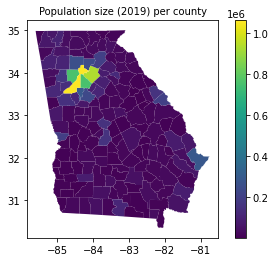

In [217]:
all_geo.plot("totpop19", legend = True)
plt.title("Population size (2019) per county", fontsize = 10)
plt.savefig("totpop19.png")
plt.show()

In [116]:
all_geo["totpop19_1000"] = all_geo["totpop19"] / 1000

In [126]:
all_geo["totpop19_10000"] = all_geo["totpop19"] / 10000

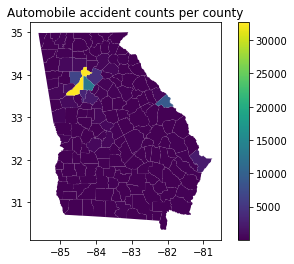

In [223]:
all_geo.plot("accident_count", legend = True)
plt.title("Automobile accident counts per county")
plt.savefig("accident_count.png")
plt.show()

In [165]:
all_geo["accident_prevalence"] = all_geo["accident_count"] / all_geo["totpop19"]

In [174]:
all_geo["accident_prevalence_1000"] = all_geo["accident_count"] / all_geo["totpop19_1000"]

In [175]:
all_geo["accident_prevalence_10000"] = all_geo["accident_count"] / all_geo["totpop19_10000"]

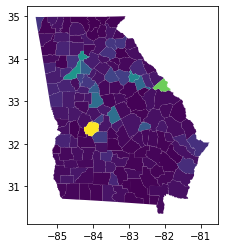

In [176]:
all_geo.plot("accident_prevalence")

plt.show()

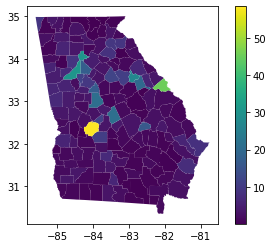

In [179]:
all_geo.plot("accident_prevalence_1000", legend = True)

plt.show()

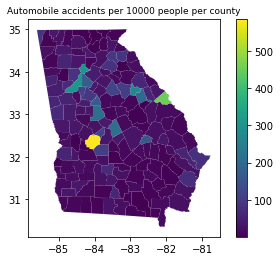

In [227]:
all_geo.plot("accident_prevalence_10000", legend = True)
plt.title("Automobile accidents per 10000 people per county", fontsize = 9)
plt.savefig("accident_prevalence_10000.png")
plt.show()

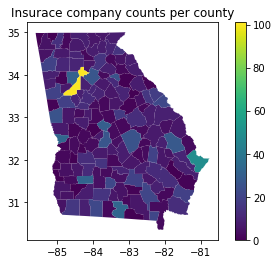

In [221]:
all_geo.plot("all_companies", legend = True)
plt.title("Insurace company counts per county", fontsize = 12)
plt.savefig("all_companies.png")
plt.show()

In [120]:
all_geo["ic_rate"] = all_geo["all_companies"] / all_geo["totpop19"]

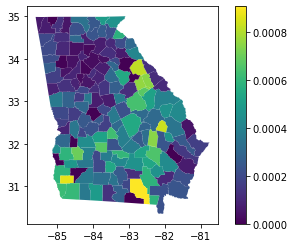

In [122]:
all_geo.plot("ic_rate", legend = True)

plt.show()

In [129]:
all_geo["ic_rate_1000"] = all_geo["all_companies"] / all_geo["totpop19_1000"]

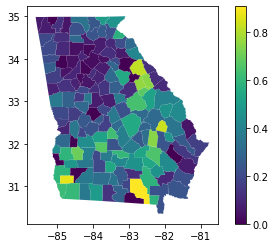

In [125]:
all_geo.plot("ic_rate_1000", legend = True)

In [130]:
all_geo["ic_rate_10000"] = all_geo["all_companies"] / all_geo["totpop19_10000"]

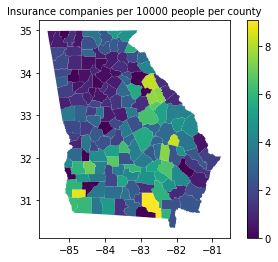

In [222]:
all_geo.plot("ic_rate_10000", legend = True)
plt.title("Insurance companies per 10000 people per county", fontsize = 10)
plt.savefig("ic_per_10000.png")
plt.show()

'allstate',
 'statefarm',
 'country',
 'farm_bureau',
 'nationwide',
 'alfa',
 'american_family',
 'aflac',
 'acceptance',
 'cotton_states',

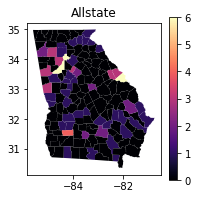

In [229]:
all_geo.plot("allstate", legend = True, cmap = "magma", figsize = (3,3))
plt.title("Allstate")
plt.savefig("allstate.png")
plt.show()

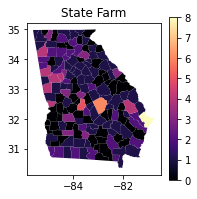

In [230]:
all_geo.plot("statefarm", legend = True, cmap = "magma", figsize = (3,3))
plt.title("State Farm")
plt.savefig("statefarm.png")
plt.show()

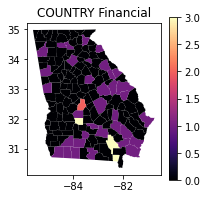

In [231]:
all_geo.plot("country", legend = True, cmap = "magma", figsize = (3,3))
plt.title("COUNTRY Financial")
plt.savefig("country.png")
plt.show()

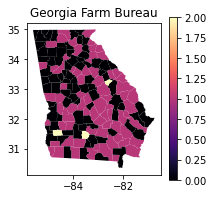

In [232]:
all_geo.plot("farm_bureau", legend = True, cmap = "magma", figsize = (3,3))
plt.title("Georgia Farm Bureau")
plt.savefig("farm_bureau.png")
plt.show()

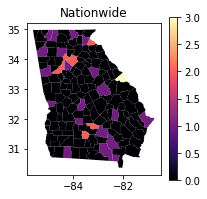

In [233]:
all_geo.plot("nationwide", legend = True, cmap = "magma", figsize = (3,3))
plt.title("Nationwide")
plt.savefig("nationwide.png")
plt.show()

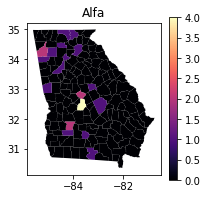

In [234]:
all_geo.plot("alfa", legend = True, cmap = "magma", figsize = (3,3))
plt.title("Alfa")
plt.savefig("alfa.png")
plt.show()

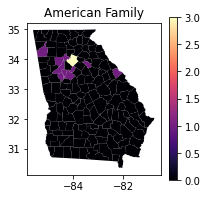

In [235]:
all_geo.plot("american_family", legend = True, cmap = "magma", figsize = (3,3))
plt.title("American Family")
plt.savefig("america_family.png")
plt.show()

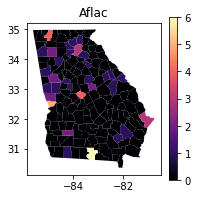

In [236]:
all_geo.plot("aflac", legend = True, cmap = "magma", figsize = (3,3))
plt.title("Aflac")
plt.savefig("aflac.png")
plt.show()

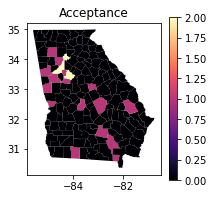

In [237]:
all_geo.plot("acceptance", legend = True, cmap = "magma", figsize = (3,3))
plt.title("Acceptance")
plt.savefig("acceptance.png")
plt.show()

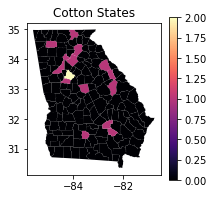

In [238]:
all_geo.plot("cotton_states", legend = True, cmap = "magma", figsize = (3,3))
plt.title("Cotton States")
plt.savefig("cotton_states.png")
plt.show()

**Another option is to merge via sjoin(); this way, the accident locations are merged to county based on location**

In [43]:
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(accidents["longitude"], accidents["latitude"])]
crs = 'EPSG:4326'

accidents_gdf = geopd.GeoDataFrame(accidents, crs = crs, geometry = geometry)

In [135]:
county_poly.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

**Example of spatial joing. Join the accident locations DataFrame to the county polygon GeoDataFrame.**
    * Also see the R code for the Hot-Spot Analysis to see another example of a spatial joing, in R.

In [136]:
county_pop_accidents = geopd.sjoin(accidents_gdf, county_poly, how="left", op="intersects")

In [139]:
display(county_pop_accidents)

,Unnamed: 0,Start_Time,latitude,longitude,County,State,Country,Timezone,geometry,index_right,...,MPO,MSA,F1HR_NA,F8HR_NA,Reg_Comm,Acres,Sq_Miles,Label,GlobalID,last_edite
0,0,2017-01-02 14:19:23,33.399803,-84.807594,Coweta,GA,US,US/Eastern,POINT (-84.80759 33.39980),120.0,...,Y,Y,Y,Y,Three Rivers,285287.0,445.760986,COWETA,{A5D715F1-B2A9-4EDB-AFAA-FFC194FC6311},NaN
1,1,2017-01-02 13:44:38,34.174515,-84.758995,Bartow,GA,US,US/Eastern,POINT (-84.75899 34.17451),58.0,...,N,Y,N,Y,Northwest Georgia,300840.0,470.062988,BARTOW,{A0492A5A-1A5A-4647-B5D0-7C6E191136FE},1.444844e+12
2,2,2017-01-02 14:10:42,33.652431,-84.396278,Fulton,GA,US,US/Eastern,POINT (-84.39628 33.65243),89.0,...,Y,Y,Y,Y,Atlanta Regional Commission,341906.0,534.229004,FULTON,{44A3942A-9608-4E68-A927-A38721FF266D},NaN
3,3,2017-01-02 13:57:42,33.744976,-84.390343,Fulton,GA,US,US/Eastern,POINT (-84.39034 33.74498),89.0,...,Y,Y,Y,Y,Atlanta Regional Commission,341906.0,534.229004,FULTON,{44A3942A-9608-4E68-A927-A38721FF266D},NaN
4,4,2017-01-02 14:09:31,33.928226,-84.176018,Gwinnett,GA,US,US/Eastern,POINT (-84.17602 33.92823),71.0,...,Y,Y,Y,Y,Atlanta Regional Commission,279481.0,436.688995,GWINNETT,{3BBB29C1-CFA9-4906-B2DA-6D86E4FB8DAD},NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93869,93869,2019-08-23 20:43:54,33.920200,-84.320150,DeKalb,GA,US,US/Eastern,POINT (-84.32015 33.92020),137.0,...,Y,Y,Y,Y,Atlanta Regional Commission,173496.0,271.087006,DEKALB,{3912F679-CB5F-4618-B448-53B943B436DF},NaN
93870,93870,2019-08-23 19:08:30,33.803530,-84.249600,DeKalb,GA,US,US/Eastern,POINT (-84.24960 33.80353),137.0,...,Y,Y,Y,Y,Atlanta Regional Commission,173496.0,271.087006,DEKALB,{3912F679-CB5F-4618-B448-53B943B436DF},NaN
93871,93871,2019-08-23 19:08:30,33.803350,-84.249240,DeKalb,GA,US,US/Eastern,POINT (-84.24924 33.80335),137.0,...,Y,Y,Y,Y,Atlanta Regional Commission,173496.0,271.087006,DEKALB,{3912F679-CB5F-4618-B448-53B943B436DF},NaN
93872,93872,2019-08-23 20:29:30,33.895722,-84.252706,DeKalb,GA,US,US/Eastern,POINT (-84.25271 33.89572),137.0,...,Y,Y,Y,Y,Atlanta Regional Commission,173496.0,271.087006,DEKALB,{3912F679-CB5F-4618-B448-53B943B436DF},NaN


In [138]:
county_pop_accidents.groupby(["County"]).County.count()



County
Appling       15
Atkinson      14
Bacon         20
Baker         11
Baldwin       85
            ... 
Whitfield    280
Wilcox         1
Wilkes        63
Wilkinson     15
Worth         54
Name: County, Length: 163, dtype: int64

**Looks like DeKalb is converted to Dekalb (for some reason) while merging the GeoDataFrame.**

   * Same issue with McDuffie and McIntosh.

**Macon-Bibb was stored as just "Macon" in census data**
    * This led us to some additional cleaning of the accident data!
    * See accidents_GA.ipynb

